# SciPy
---
<img src="https://scipy.org/images/logo.svg" style="width: 20%;"/>

SciPy包含许多专注于科学计算中的常见问题的工具箱。它的子模块对应于不同的应用，比如插值、积分、优化、图像处理、统计和特殊功能等。

SciPy可以与其他标准科学计算包相对比，比如GSL (C和C++的GNU科学计算包), 或者Matlab的工具箱。SciPy是Python中科学程序的核心程序包；这意味着有效的操作NumPy数组，因此，NumPy和SciPy可以一起工作。

在实现一个程序前，有必要确认一下需要的数据处理方式是否已经在SciPy中实现了。作为非专业程序员，科学家通常倾向于**重新发明轮子**，这产生了小玩具、不优化、很难分享以及不可以维护的代码。相反，SciPy的程序是优化并且测试过的，因此应该尽可能使用。

**警告** 这个教程根本不是数值计算的介绍。因为列举SciPy的不同子模块和功能将会是非常枯燥的，相反我们将聚焦于列出一些例子，给出如何用SciPy进行科学计算的大概思路。

## 参考资料

[SciPy文档](https://docs.scipy.org/doc/scipy/)

## SciPy任务子模块
---

| 关键词参数 | 可选值 |
|---|---|
|[scipy.cluster](http://docs.scipy.org/doc/scipy/reference/cluster.html#module-scipy.cluster) | 向量计算|
|[scipy.constants](http://docs.scipy.org/doc/scipy/reference/constants.html#module-scipy.constants) | 物理和数学常量|
|[scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack) | 傅里叶变换|
|[scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) | 积分程序|
|[scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate) | 插值|
|[scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io) | 数据输入和输出|
|[scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg) |  线性代数程序|
|[scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage) | n-维图像包|
|[scipy.odr](http://docs.scipy.org/doc/scipy/reference/odr.html#module-scipy.odr) | 正交距离回归|
|[scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) | 优化|
|[scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal) | 信号处理|
|[scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html#module-scipy.sparse) | 稀疏矩阵|
|[scipy.spatial](http://docs.scipy.org/doc/scipy/reference/spatial.html#module-scipy.spatial) | 空间数据结构和算法|
|[scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special) | 一些特殊数学函数|
|[scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) | 统计|

他们全都依赖于[NumPy](http://docs.scipy.org/doc/numpy/reference/index.html#numpy), 但是大多数是彼此独立的。

导入NumPy和SciPy的标准方式：

In [1]:
import numpy as np
from scipy import stats  # 其他的子模块类似

scipy的主要命名空间通常包含的函数其实是numpy（试一下`scipy.cos`其实是`np.cos`) 。这些函数的暴露只是因为历史原因；通常没有必要在你的代码中使用`import scipy`。

## 文件输入/输出：[scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html#scipy.io)
---

载入和保存matlab文件：

In [2]:
from scipy import io as spio

a = np.ones((3, 3))
spio.savemat('file.mat', {'a': a}) # savemat expects a dictionary
data = spio.loadmat('file.mat', struct_as_record=True)
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

更多请见：

* 加载文本文件：[numpy.loadtxt()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html#numpy.loadtxt)/[numpy.savetxt()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html#numpy.savetxt)
* 智能加载文本/csv文件：[numpy.genfromtxt()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt)/numpy.recfromcsv()
* 快速有效，但是针对numpy的二进制格式：[numpy.save()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html#numpy.save)/[numpy.load()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html#numpy.load)

## 特殊函数：[scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html#scipy.special)
---

特殊函数是超验函数。[scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html#scipy.special)模块的文档字符串写的很详细，因此我们不会在这里列出所有的函数。常用的一些函数如下：

* 贝塞尔函数，比如`scipy.special.jn()` (第n个整型顺序的贝塞尔函数)
* 椭圆函数 (`scipy.special.ellipj()` Jacobian椭圆函数, ...)
* Gamma 函数: scipy.special.gamma(), 也要注意 `scipy.special.gammaln()` 将给出更高准确数值的 Gamma的log。
* Erf, 高斯曲线的面积：scipy.special.erf()

## 线性代数操作：[scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html#scipy.linalg)
---

[scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html#scipy.linalg) 模块提供了标准的线性代数操作，这依赖于底层的高效实现（BLAS、LAPACK）。

* [scipy.linalg.det()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.det.html#scipy.linalg.det) 函数计算方阵的行列式：

In [3]:
from scipy import linalg
arr = np.array([[1, 2],
                [3, 4]])
linalg.det(arr)

-2.0

In [4]:
arr = np.array([[3, 2],
                 [6, 4]])
linalg.det(arr)

6.661338147750939e-16

In [5]:
try:
    linalg.det(np.ones((3, 4)))
except ValueError:
    print("expected square matrix")

expected square matrix


* [scipy.linalg.inv()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.inv.html#scipy.linalg.inv) 函数计算逆方阵：

In [6]:
arr = np.array([[1, 2],
                 [3, 4]])
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [7]:
np.allclose(np.dot(arr, iarr), np.eye(2))

True

最后计算逆奇异矩阵（行列式为0）将抛出`LinAlgError` :

In [8]:
arr = np.array([[3, 2],
                [6, 4]])

try:
    linalg.inv(arr)
except np.linalg.LinAlgError as err:
    print("singular matrix")

singular matrix


* 还有更多高级的操作，奇异值分解（SVD）：

In [9]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

结果的数组频谱是：

In [10]:
spec

array([14.88982544,  0.45294236,  0.29654967])

原始矩阵可以用`svd`和`np.dot`矩阵相乘的结果重新获得：

In [11]:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)

True

SVD常被用于统计和信号处理。其他标准分解 (QR, LU, Cholesky, Schur), 以及线性系统的求解器，也可以在[scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html#scipy.linalg)中找到。

## 快速傅立叶变换：[scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html#scipy.fftpack)
---

[scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html#scipy.fftpack) 模块允许计算快速傅立叶变换。例子，一个（有噪音）的信号输入是这样：

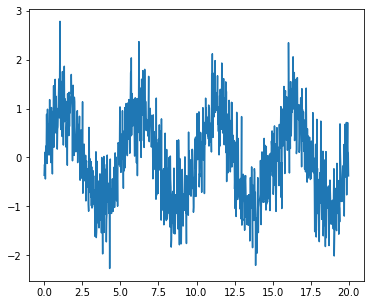

In [12]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
       0.5 * np.random.randn(time_vec.size)

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

观察者并不知道信号的频率，只知道抽样时间步骤的信号`sig`。假设信号来自真实的函数，因此傅立叶变换将是对称的。[scipy.fftpack.fftfreq()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftfreq.html#scipy.fftpack.fftfreq) 函数将生成样本序列，而[scipy.fftpack.fft()]()将计算快速傅立叶变换：

In [13]:
from scipy import fftpack
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

因为生成的幂是对称的，寻找频率只需要使用频谱为正的部分：

In [14]:
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

寻找信号频率：

In [15]:
freq = freqs[power.argmax()]
np.allclose(freq, 1./period)  # 检查是否找到了正确的频率

True

现在高频噪音将从傅立叶转换过的信号移除：

In [16]:
sig_fft[np.abs(sample_freq) > freq] = 0

生成的过滤过的信号可以用[scipy.fftpack.ifft()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.ifft.html#scipy.fftpack.ifft)函数：

In [17]:
main_sig = fftpack.ifft(sig_fft)

查看结果：

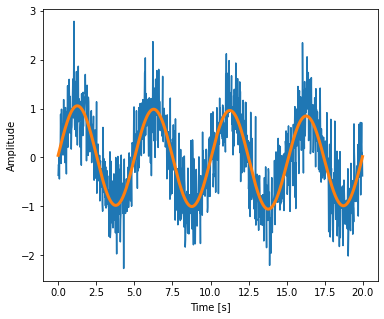

In [18]:
plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig)
plt.plot(time_vec, main_sig.real, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

## 优化及拟合：[scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html#scipy.optimize)
---

优化是寻找最小化或等式的数值解的问题。

[scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html#scipy.optimize) 模块提供了函数最小化（标量或多维度）、曲线拟合和求根的有用算法。

In [19]:
from scipy import optimize

### 寻找标量函数的最小值

让我们定义下面的函数：

In [20]:
def f(x):
    return x**2 + 10*np.sin(x)

绘制它：

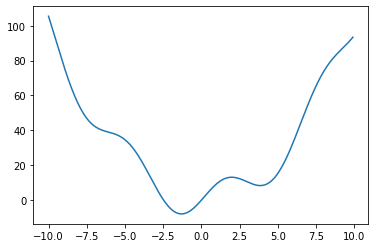

In [21]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show() 

这个函数在-1.3附近有一个全局最小并且在3.8有一个局部最小。

找到这个函数的最小值的常用有效方式是从给定的初始点开始进行一个梯度下降。[BFGS算法](https://zh.m.wikipedia.org/wiki/BFGS%E7%AE%97%E6%B3%95)是这样做的较好方式：

In [22]:
optimize.fmin_bfgs(f, 0)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 12
         Gradient evaluations: 6


array([-1.30644012])

这个方法的一个可能问题是，如果这个函数有一些局部最低点，算法可能找到这些局部最低点而不是全局最低点，这取决于初始点：

In [23]:
optimize.fmin_bfgs(f, 3, disp=0)

array([3.83746709])

如果我们不知道全局最低点，并且使用其临近点来作为初始点，那么我们需要付出昂贵的代价来获得全局最优。要找到全局最优点，最简单的算法是暴力算法，算法中会评估给定网格内的每一个点：

In [24]:
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid,))
xmin_global

array([-1.30641113])

对于更大的网格，[scipy.optimize.brute()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brute.html#scipy.optimize.brute) 变得非常慢。[scipy.optimize.anneal()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.anneal.html#scipy.optimize.anneal) 提供了一个替代的算法，使用模拟退火。对于不同类型的全局优化问题存在更多的高效算法，但是这超出了`scipy`的范畴。[OpenOpt](http://openopt.org/Welcome)、[IPOPT](https://github.com/xuy/pyipopt)、[PyGMO](http://pagmo.sourceforge.net/pygmo/index.html)和[PyEvolve](http://pyevolve.sourceforge.net/)是关于全局优化的一些有用的包。

要找出局部最低点，让我们用[scipy.optimize.fminbound](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fminbound.html#scipy.optimize.fminbound)将变量限制在(0,10)区间：

In [25]:
xmin_local = optimize.fminbound(f, 0, 10)    
xmin_local

3.8374671194983834

### 寻找标量函数的根

要寻找上面函数f的根，比如`f(x)=0`的一个点，我们可以用比如[scipy.optimize.fsolve()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html#scipy.optimize.fsolve)：

In [26]:
root = optimize.fsolve(f, 1)  # 我们的最初猜想是1
root

array([0.])

注意只找到一个根。检查`f`的图发现在-2.5左右还有应该有第二个根。通过调整我们最初的猜想，我们可以发现正确的值：

In [27]:
root2 = optimize.fsolve(f, -2.5)
root2

array([-2.47948183])

### 曲线拟合

假设我们有来自`f`的样例数据，带有一些噪音：

In [28]:
xdata = np.linspace(-10, 10, num=20)
ydata = f(xdata) + np.random.randn(xdata.size)

现在，如果我们知道这些sample数据来自的函数（这个案例中是$x^2 + sin(x)$）的函数形式，而不知道每个数据项的系数，那么我们可以用最小二乘曲线拟合在找到这些系数。首先，我们需要定义函数来拟合：

In [29]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

然后我们可以使用[scipy.optimize.curve_fit()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit)来找到`a`和`b`：

In [30]:
guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
params

array([ 0.99800628, 10.28546879])

现在我们找到了`f`的最优解和根，并且用曲线去拟合它，我们将这些结果整合在一个图中：

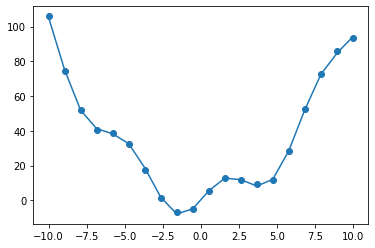

In [31]:
plt.figure(figsize=(6, 4))
plt.scatter(xdata, ydata, label='Data')
plt.plot(xdata, f2(xdata, params[0], params[1]),
         label='Fitted function')

**注**：在Scipy中包含所有最小值和寻找根的算法的统一接口：[scipy.optimize.minimize()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)、 [scipy.optimize.minimize_scalar()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar)和 [scipy.optimize.root()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root)。他们允许通过`method`关键词容易的比较多种算法。

你可以在[scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html#scipy.optimize)中找到对于多维度问题有相同功能的算法。

## 统计和随机数：[scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html#scipy.stats)
---

[scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html#scipy.stats)模块包含统计工具和随机过程的概率描述。在`numpy.random`中可以找到多个随机数生成器。

### 直方图和概率密度函数

给定随机过程的观察值，它们的直方图是随机过程的PDF（概率密度函数）的估计值：

In [32]:
a = np.random.normal(size=1000)
bins = np.arange(-4, 5)
bins

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [33]:
histogram = np.histogram(a, bins=bins)[0]
bins = 0.5*(bins[1:] + bins[:-1])
bins

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

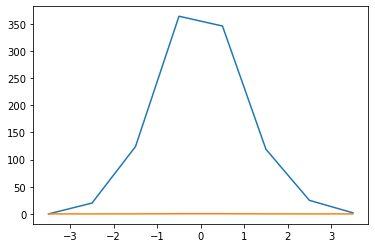

In [34]:
from scipy import stats

b = stats.norm.pdf(bins)  # norm 是一种分布
plt.plot(bins, histogram)
plt.plot(bins, b)
plt.show()

如果我们知道随机过程属于特定的随机过程家族，比如正态过程，我们可以做一个观察值的最大可能性拟合，来估计潜在分布的参数。这里我们用随机过程拟合观察数据：

In [35]:
loc, std = stats.norm.fit(a)
loc

0.011189137049392396

In [36]:
std

0.9705931590322288

### 百分位数

中位数是有一半值在其上一半值在其下的值：

In [37]:
np.median(a) 

-0.01801861542195541

中数也被称为百分位数50，因为50%的观察值在它之下：

In [38]:
stats.scoreatpercentile(a, 50) 

-0.01801861542195541

同样，我们也能计算百分位数90：

In [39]:
stats.scoreatpercentile(a, 90)

1.2219837358948924

百分位数是CDF的估计值：累积分布函数。

### 统计检验

统计检验是一个决策指示器。例如，如果我们有两组观察值，我们假设他们来自于高斯过程，我们可以用T检验来决定这两组观察值是不是显著不同：

In [40]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)
stats.ttest_ind(a, b)   

Ttest_indResult(statistic=-4.288820991513533, pvalue=3.923535178937496e-05)

生成的结果由以下内容组成：

* T 统计值：一个值，符号与两个随机过程的差异成比例，大小与差异的程度有关。
* p 值：两个过程相同的概率。如果它接近1，那么这两个过程几乎肯定是相同的。越接近于0，越可能这两个过程有不同的平均数。

## 插值：[scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html#scipy.interpolate)
---

[scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html#scipy.interpolate)对从实验数据中拟合函数是非常有用的，因此，评估没有测量过的点。这个模块是基于[netlib](http://www.netlib.org/)项目的[Fortran子程序 FITPACK](http://www.netlib.org/dierckx/index.html)

假想一个接近sine函数的实验数据：

In [41]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

[scipy.interpolate.interp1d](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)类可以建立一个线性插值函数：

In [42]:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

`scipy.interpolate.linear_interp`实例需要评估感兴趣的时间点：

In [43]:
computed_time = np.linspace(0, 1, 50)
linear_results = linear_interp(computed_time)

通过提供可选的参数`kind`也可以选择进行立方插值：

In [44]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(computed_time)

现在结果可以被整合为下面的Matplotlib图片:

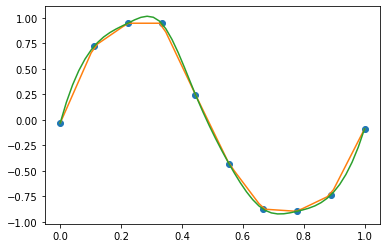

In [45]:
plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(computed_time, linear_results, label='linear interp')
plt.plot(computed_time, cubic_results, label='cubic interp')

[scipy.interpolate.interp2d](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html#scipy.interpolate.interp2d) 与[scipy.interpolate.interp1d](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)类似，但是是用于2-D数组。注意对于`interp`家族，计算的时间点必须在测量时间段之内。

## 数值积分：[scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html#scipy.integrate)
---

[scipy.integrate.quad()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad)是最常见的积分程序：

In [46]:
from scipy.integrate import quad
res, err = quad(np.sin, 0, np.pi/2)
np.allclose(res, 1)

True

In [47]:
np.allclose(err, 1 - res)

True

其他的积分程序可以在`fixed_quad`、 `quadrature`、`romberg`中找到。

[scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html#scipy.integrate) 可提供了常微分公式(ODE)的特色程序。特别的，[scipy.integrate.odeint()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint) 是使用LSODA（Livermore Solver for Ordinary Differential equations with Automatic method switching for stiff and non-stiff problems）的通用积分器，更多细节请见[ODEPACK Fortran 库](http://people.sc.fsu.edu/~jburkardt/f77_src/odepack/odepack.html)。

`odeint`解决如下形式的第一顺序ODE系统：

$dy/dt = rhs(y1, y2, .., t0,...)$

作为一个介绍，让我们解一下在初始条件下$y(t=0) = 1$，这个常微分公式$dy/dt = -2y$在$t = 0..4$时的值。首先，这个函数计算定义位置需要的导数：

In [48]:
def calc_derivative(ypos, time, counter_arr):
    counter_arr += 1
    return -2 * ypos

添加了一个额外的参数`counter_arr`用来说明这个函数可以在一个时间步骤被调用多次，直到收敛。计数器数组定义如下：

In [49]:
counter = np.zeros((1,), dtype=np.uint16)

现在计算轨迹线：

In [50]:
from scipy.integrate import odeint
time_vec = np.linspace(0, 4, 40)
yvec, info = odeint(calc_derivative, 1, time_vec,
                    args=(counter,), full_output=True)

因此，导数函数被调用了40多次（即时间步骤数）：

In [51]:
counter

array([129], dtype=uint16)

前十个时间步骤的累积循环数，可以用如下方式获得：

In [52]:
info['nfe'][:10]

array([31, 35, 43, 49, 53, 57, 59, 63, 65, 69], dtype=int32)

注意，求解器对于首个时间步骤需要更多的循环。导数答案`yvec`可以画出来：

Text(0, 0.5, 'y: Position')

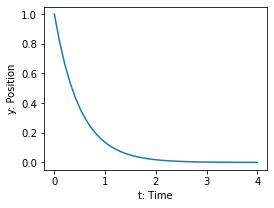

In [53]:
plt.figure(figsize=(4, 3))
plt.plot(time_vec, yvec)
plt.xlabel('t: Time')
plt.ylabel('y: Position')

阻尼弹簧重物振子（二阶振荡器）是使用[scipy.integrate.odeint()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint)的另一个例子。链接到弹簧的重物的位置服从二阶常微分方程$y'' + 2 eps wo  y' + wo^2 y = 0$，其中$wo^2 = k/m$ 弹簧的常数为k, m是重物质量，$eps=c/(2 m wo)$，c是阻尼系数。例如，我们选择如下参数：

In [54]:
mass = 0.5  # kg
kspring = 4  # N/m
cviscous = 0.4  # N s/m

因此系统将是欠阻尼的，因为：

In [55]:
eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
eps < 1

True

对于[scipy.integrate.odeint()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint)求解器，二阶等式需要被变换为系统内向量$Y=(y, y')$的两个一阶等式。为了方便，定义$nu = 2 eps * wo = c / m$和$om = wo^2 = k/m$：

In [56]:
nu_coef = cviscous / mass
om_coef = kspring / mass

因此函数将计算速度和加速度：

In [57]:
def calc_deri(yvec, time, nuc, omc):
    return (yvec[1], -nuc * yvec[1] - omc * yvec[0])

time_vec = np.linspace(0, 10, 100)
yarr = odeint(calc_deri, (1, 0), time_vec, args=(nu_coef, om_coef))

如下的Matplotlib图片显示了最终的位置和速度：

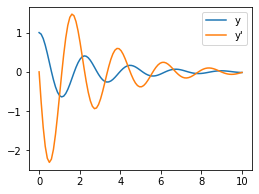

In [58]:
plt.figure(figsize=(4, 3))
plt.plot(time_vec, yarr[:, 0], label='y')
plt.plot(time_vec, yarr[:, 1], label="y'")
plt.legend(loc='best')

在Sicpy中没有偏微分方程（PDE）求解器。存在其他求解PDE的Python包，比如[fipy](http://www.ctcms.nist.gov/fipy/)或[SfePy](http://code.google.com/p/sfepy/)。

## 信号处理：[scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html#scipy.signal)
---

- [scipy.signal.detrend()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html#scipy.signal.detrend): 从信号中删除线性趋势：

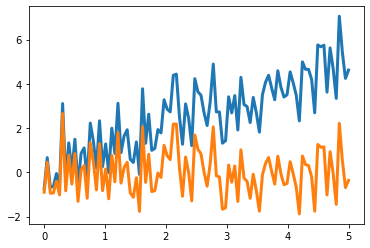

In [59]:
from scipy import signal

t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

plt.plot(t, x, linewidth=3)
plt.plot(t, signal.detrend(x), linewidth=3)
plt.show()

- [scipy.signal.resample()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.resample.html#scipy.signal.resample): 用FFT从信号中抽出n个点。

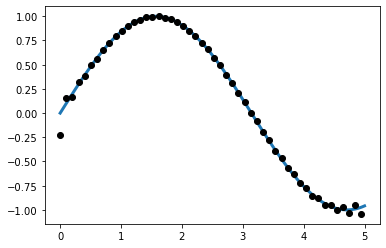

In [60]:
t = np.linspace(0, 5, 100)
x = np.sin(t)

plt.plot(t, x, linewidth=3)
plt.plot(t[::2], signal.resample(x, 50), 'ko')
plt.show()

- [scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html#scipy.signal) 有许多窗口函数：[scipy.signal.hamming()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hamming.html#scipy.signal.hamming), [scipy.signal.bartlett()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bartlett.html#scipy.signal.bartlett), [scipy.signal.blackman()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.blackman.html#scipy.signal.blackman)...
- [scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html#scipy.signal) 有滤镜 (中位数滤镜[scipy.signal.medfilt()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt.html#scipy.signal.medfilt), Wiener[scipy.signal.wiener()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.wiener.html#scipy.signal.wiener))

## 图像处理：scipy.ndimage
---

scipy中专注于专注于图像处理的模块是scipy.ndimage。

In [61]:
from scipy import ndimage

图像处理程序可以根据他们进行的处理来分类。

### 图像的几何变换

改变原点，解析度，..

In [62]:
from scipy import misc

face = misc.face(gray=True)
shifted_face = ndimage.shift(face, (50, 50))
shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest')
rotated_face = ndimage.rotate(face, 30)
cropped_face = face[50:-50, 50:-50]
zoomed_face = ndimage.zoom(face, 2)
zoomed_face.shape

(1536, 2048)

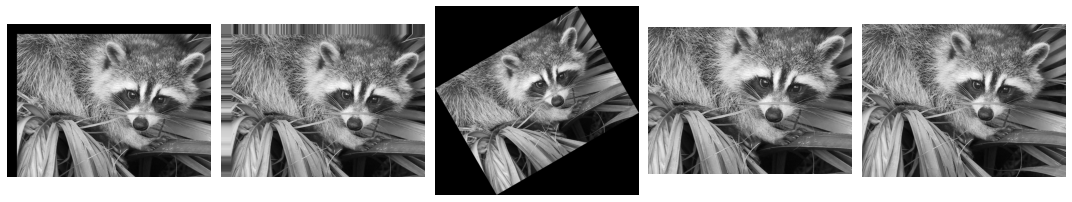

In [63]:
plt.figure(figsize=(15, 3))
plt.subplot(151)
plt.imshow(shifted_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(152)
plt.imshow(shifted_face2, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(153)
plt.imshow(rotated_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(154)
plt.imshow(cropped_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(155)
plt.imshow(zoomed_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

### 图像滤波器

In [64]:
from scipy import misc

face = misc.face(gray=True)
face = face[:512, -512:]  # crop out square on right
import numpy as np
noisy_face = np.copy(face).astype(float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)

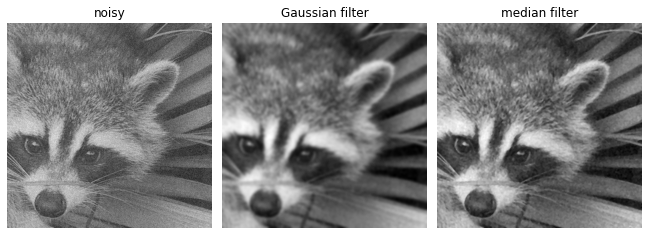

In [65]:
plt.figure(figsize=(9, 3.5))
plt.subplot(131)
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('noisy')

plt.subplot(132)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gaussian filter')

plt.subplot(133)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('median filter')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

在[scipy.ndimage.filters](http://docs.scipy.org/doc/scipy/reference/ndimage.html#scipy.ndimage.filters) 和 [scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html#scipy.signal) 有更多应用于图像的滤波器。

### 数学形态学

[数学形态学](https://en.wikipedia.org/wiki/Mathematical_morphology)是集合理论分支出来的一个数学理论。它刻画并转换几何结构。特别是二元的图像（黑白）可以用这种理论来转换：被转换的集合是临近非零值像素的集合。这个理论也可以被扩展到灰度值图像。

![](Images/morpho_mat.png)

初级数学形态学操作使用结构化的元素，以便修改其他几何结构。

首先让我们生成一个结构化元素。

In [66]:
el = ndimage.generate_binary_structure(2, 1)
el

array([[False,  True, False],
       [ True,  True,  True],
       [False,  True, False]])

In [67]:
el.astype(int)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

- 腐蚀

In [68]:
a = np.zeros((7,7), dtype=int)
a[1:6, 2:5] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [69]:
ndimage.binary_erosion(a).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [70]:
#腐蚀移除了比结构小的对象
ndimage.binary_erosion(a, structure=np.ones((5,5))).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

- 扩张 

In [71]:
a = np.zeros((5, 5))
a[2, 2] = 1
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [72]:
ndimage.binary_dilation(a).astype(a.dtype)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])

- 开启

In [73]:
a = np.zeros((5,5), dtype=int)
a[1:4, 1:4] = 1; a[4, 4] = 1
a

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

In [74]:
# 开启移除了小对象
ndimage.binary_opening(a, structure=np.ones((3,3))).astype(int)

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

In [75]:
# 开启也可以平滑拐角
ndimage.binary_opening(a).astype(int)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

- 闭合: `ndimage.binary_closing`

开启操作移除小的结构，而关闭操作填满了小洞。因此这些用来”清洗“图像。

In [76]:
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25*np.random.standard_normal(a.shape)
mask = a>=0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)

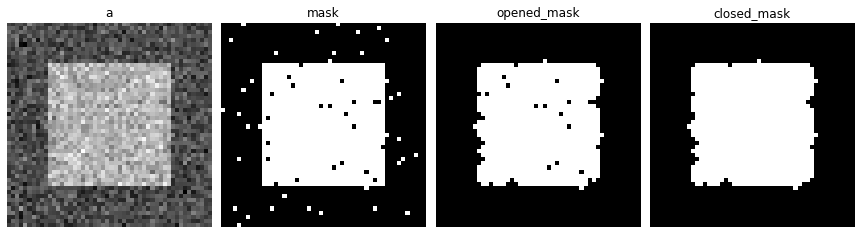

In [77]:
plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(a, cmap=plt.cm.gray)
plt.axis('off')
plt.title('a')

plt.subplot(142)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('mask')

plt.subplot(143)
plt.imshow(opened_mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('opened_mask')

plt.subplot(144)
plt.imshow(closed_mask, cmap=plt.cm.gray)
plt.title('closed_mask')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

对于*灰度值图像*，腐蚀（区别于扩张）相当于用感兴趣的像素周围的结构元素中的最小（区别于最大）值替换像素。

In [78]:
a = np.zeros((7,7), dtype=int)
a[1:6, 1:6] = 3
a[4,4] = 2; a[2,3] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 3, 3, 1, 3, 3, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 3, 3, 3, 2, 3, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [79]:
ndimage.grey_erosion(a, size=(3,3))

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 3, 2, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

### 测量图像

首先让我们生成一个漂亮的人造二维图。

In [80]:
x, y = np.indices((100, 100))
sig = np.sin(2*np.pi*x/50.)*np.sin(2*np.pi*y/50.)*(1+x*y/50.**2)**2
mask = sig > 1

现在让我们看一下图像中对象的各种信息：

In [81]:
labels, nb = ndimage.label(mask)
nb

8

In [82]:
areas = ndimage.sum(mask, labels, range(1, labels.max()+1))
areas

array([190.,  45., 424., 278., 459., 190., 549., 424.])

In [83]:
maxima = ndimage.maximum(sig, labels, range(1, labels.max()+1))
maxima

array([ 1.80238238,  1.13527605,  5.51954079,  2.49611818,  6.71673619,
        1.80238238, 16.76547217,  5.51954079])

In [84]:
ndimage.find_objects(labels==4)

[(slice(30, 48, None), slice(30, 48, None))]

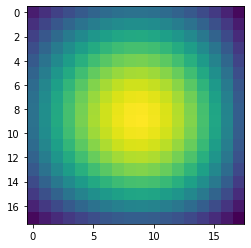

In [85]:
sl = ndimage.find_objects(labels==4)
plt.imshow(sig[sl[0]])  
plt.show()

### 图像处理应用：计数气泡和未融化的颗粒

![](Images/MV_HFV_012.jpg)

#### 问题描述

1. 打开图像文件MV_HFV_012.jpg并且浏览一下。看一下imshow文档字符串中的参数，用“右”对齐来显示图片（原点在左下角，而不是像标准数组在右上角）。这个扫描元素显微图显示了一个带有一些气泡（黑色）和未溶解沙（深灰）的玻璃样本（轻灰矩阵）。我们想要判断样本由三个状态覆盖的百分比，并且预测沙粒和气泡的典型大小和他们的大小等。

2. 修建图片，删除带有测量信息中底部面板。

3. 用中位数过滤稍稍过滤一下图像以便改进它的直方图。看一下直方图的变化。

4. 使用过滤后图像的直方图，决定允许定义沙粒像素，玻璃像素和气泡像素掩蔽的阈限。其他的选项：写一个函数从直方图的最小值自动判断阈限。

5. 将三种不同的相用不同的颜色上色并显示图片。

6. 用数学形态学清理不同的相。

7. 为所有气泡和沙粒做标签，从沙粒中删除小于10像素的掩蔽。要这样做，用`ndimage.sum`或`np.bincount`来计算沙粒大小。

8. 计算气泡的平均大小。

In [86]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

date = plt.imread('Images/MV_HFV_012.jpg')

- 修建图片，删除带有测量信息中底部面板。

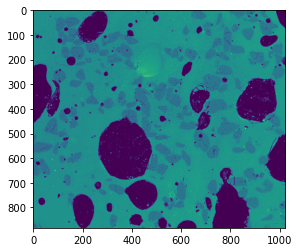

In [87]:
date = date[:-60]
plt.imshow(date)

- 用中位数过滤稍稍过滤一下图像以便改进它的直方图。看一下直方图的变化。

In [88]:
filtdate = ndimage.median_filter(date, size=(7,7))
hi_date = np.histogram(date, bins=np.arange(256))
hi_filtdate = np.histogram(filtdate, bins=np.arange(256))

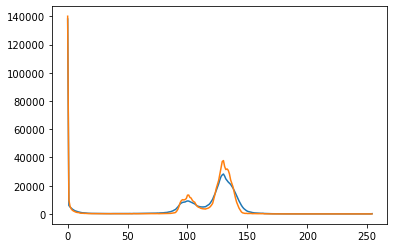

In [89]:
plt.plot(hi_date[1][:-1], hi_date[0])
plt.plot(hi_filtdate[1][:-1], hi_filtdate[0])

- 使用过滤后图像的直方图，决定允许定义沙粒像素，玻璃像素和气泡像素掩蔽的阈限。其他的选项：写一个函数从直方图的最小值自动判断阈限。

In [90]:
void = filtdate <= 50
sand = np.logical_and(filtdate > 50, filtdate <= 114)
glass = filtdate > 114

- 将三种不同的相用不同的颜色上色并显示图片。

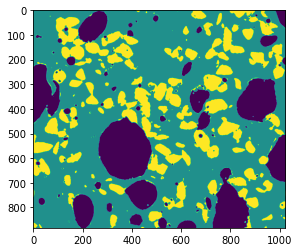

In [91]:
phases = void.astype(int) + 2*glass.astype(int) + 3*sand.astype(int)
plt.imshow(phases)

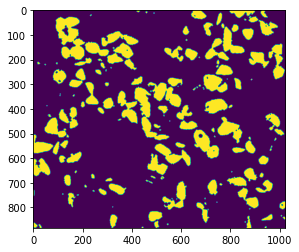

In [92]:
sand_op = ndimage.binary_opening(sand, iterations=2)
plt.imshow(sand_op.astype(int))

- 为所有气泡和沙粒做标签，从沙粒中删除小于10像素的掩蔽。要这样做，用`ndimage.sum`或`np.bincount`来计算沙粒大小。

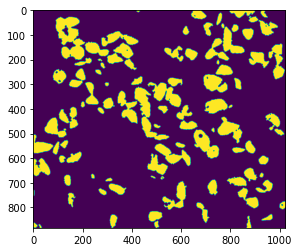

In [93]:
sand_labels, sand_nb = ndimage.label(sand_op)
sand_areas = np.array(ndimage.sum(sand_op, sand_labels, np.arange(sand_labels.max()+1)))
mask = sand_areas > 100
remove_small_sand = mask[sand_labels.ravel()].reshape(sand_labels.shape)
plt.imshow(remove_small_sand.astype(int))

- 计算气泡的平均大小。

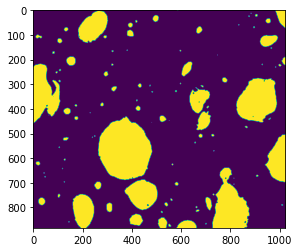

In [94]:
plt.imshow(void.astype(int))

In [95]:
bubbles_labels, bubbles_nb = ndimage.label(void)
bubbles_areas = np.bincount(bubbles_labels.ravel())[1:]
mean_bubble_size = bubbles_areas.mean()
median_bubble_size = np.median(bubbles_areas)
mean_bubble_size, median_bubble_size

(1.699875e+03, 65.0)